In [1]:
import xml.etree.cElementTree as etree
import string
import subprocess 
import json
import re
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import operator
from bs4 import BeautifulSoup
import requests
from fa2 import ForceAtlas2 as FA2

In [2]:
fandomDump = 'harrypotter_pages_current.xml'

In [3]:
with open("../characters.json") as characters_json:
    characters = json.load(characters_json)

In [4]:
characterSet = set(map(lambda x: x.lower(), characters))

In [5]:
namespacestr = '{http://www.mediawiki.org/xml/export-0.10/}'
namespace = {'mw': 'http://www.mediawiki.org/xml/export-0.10/'}

In [6]:
# Substitu space for _ and cut link
def cleanLink(link):
    split = re.split(r'[|]+', link)
    return split[0]

In [7]:
def parse_Infobox(text):
    blood = re.search(r"\|blood\s*=(.*?)\n\|", text, flags=re.DOTALL)
    if blood:
        blood = blood.groups()
    else:
        blood = "None"
    house = re.search(r"\|house\s*=\s*\[\[([\w-]+)\]]", text)
    if house:
        house = house.groups()
    else:
        house = "None"
    loyalty = re.search(r"\|loyalty\s*=(.*?)\}\}", text, flags=re.DOTALL)
    if loyalty:
        loyalty = loyalty.groups()
    else:
        loyalty = "None"
    return(blood, house, loyalty)

In [8]:
with open("../characters.json") as characters_json:
    characters = json.load(characters_json)

In [9]:
with open("importantMissingDict.json") as in_file:
    missing_dict = json.load(in_file)

In [10]:
irrelevant_for_network = ["j. k. rowling", "headmaster", "death", "lily potter", "james potter"]

for character in characterSet:
    if "family" in character:
        irrelevant_for_network.append(character)
        
for character in irrelevant_for_network:
    characterSet.remove(character)

In [11]:
for character in missing_dict.itervalues():
    characterSet.add(character)

In [12]:
def process_dump(file_name):
    character_links = {}
    character_info = {}
    for i , (event, elem) in enumerate(etree.iterparse(file_name, events=('start', 'end', 'start-ns', 'end-ns'))):
        # In case that we find tag <page> we continue
        if event == 'end' and elem.tag == namespacestr + 'page':
            # search for tag <title> inside tag <page>
            title = elem.find('.//mw:title', namespace)
            if title is not None: 
                # save text of the title
                title = title.text.lower()
                # skip if the page is not for one of the characters
                if title not in characterSet:
                    continue
                # search for tag <text> inside tag <page> 
                text_elem = elem.find('.//mw:text', namespace)
                # tag text exist and is not empty and does not contain world from blacklist
                if text_elem is not None and text_elem.text is not None:
                    wiki_text = text_elem.text.lower()
                    text = wiki_text
                
                    #skip if the page is a redirect page
                    if "#redirect" in wiki_text:
                        continue
                    
                    blood, house, loyalty = parse_Infobox(wiki_text)
                    character_info[title] = {
                        "blood":blood,
                        "house":house,
                        "loyalty": loyalty
                    }
                    link_list = []
                    # find all links in article
                    for link in re.findall(r'\[\[(.*?)\]\]',wiki_text):
                        clink = cleanLink(link)
                        if clink in characterSet:
                            link_list.append(clink)
                    # get metadata from article                  
                    character_links[title]=link_list   
                                          
                        
    return character_links, character_info

In [13]:
character_links, charInfo = process_dump(fandomDump)

{{cursedchildspoiler}}
{{youmay|[[harry potter]]'s father| [[james potter ii|harry potter's son]], who is named after him}}{{semiprotected}}
{{fa}}
{{individual infobox
|theme=phoenix
|image=[[file:1174922 1359538274196 full.jpg|250px]]
|name=james potter
|born=[[27 march]]<ref name="bd">{{dh|b|16}}</ref>, [[1960]]<br/>[[england]]<ref>[http://www.accio-quote.org/articles/2000/0700-swns-alfie.htm 8 july 2000 south west news service world exclusive interview with j k rowling]</ref>, [[great britain]]
|died=[[31 october]], [[1981]] (aged 21)<br />[[godric's hollow]], [[west country]], [[england]], [[great britain]]
|blood=[[pure-blood]]<ref name="blood">{{hbp|b|12}} - "even as he said it, harry remembered that his father had been pure-blood, but he pushed the thought out of his mind; he would worry about that later...."</ref><ref name="blood2">{{hbp|b|16}} - “james was a pureblood, harry, and i promise you, he never asked us to call him ‘prince.’”</ref>
|marital=married
|alias=prongs (by 

[[category:wizards]]
{{cursedchildspoiler}}
{{youmay|[[harry potter]]'s son|his [[james  potter i|grandfather]] and partial namesake}}{{individual infobox
|theme=gryffindor
|image=[[hpdh2-3922.jpg]]
|name=james sirius potter 
|hideb=
|born= between 1 september [[2003]] and 31 august [[2004]]<ref name="jkr-twitter-james-potter">[https://twitter.com/jk_rowling/status/638641255094853632 i'm in edinburgh, so could somebody at king's cross wish james s potter good luck for me? he's starting at hogwarts today. ] posted by jkr on twitter on 1 september 2015</ref>
|died=
|blood=[[half-blood]]<ref name="blood">[https://web.archive.org/web/20060316221500/https://www.jkrowling.com/textonly/en/faq_view.cfm?id=58 faq] (internet archive) from {{jkrs}} - for an individual to be pure-blood, the witch or wizard should at least have no muggle or muggle-born parents or grandparents. therefore, the children of harry and ginny weasley are also half-blood as muggle-born lily is their grandmother.</ref>
|mar

[[category:wizards|potter, james ii]]


In [14]:
#Save dictionary to json
#with open('characterLinksDic.json', 'w+') as outfile:
#    character_links, charInfo = findChartersLinks(fandomDump)
#    json.dump(character_links, outfile)

In [15]:
# detec the characters from the characterlist that werent't found in the wiki
found_characters = set(charInfo.keys())
for character in characterSet:
    if character not in found_characters:
        print character

sgt. fisher
mrs. finch-fletchley
male student who accidentally transfigured his friend into a badger
mrs. diggory
wand-shine elf
bob, bill, and barnaby ollerton
mrs fudge
king arthur
avery
goyle sr.
mr. payne
roger davies' girlfriend
o.w.l. care of magical creatures examiner
vampire now unable to eat anything but lettuce
king george iii
hardwin, son of linfred of stinchcombe
montague
mr. and mrs. riddle
tom marvolo riddle
amelia susan bones
ghouls
mad-eye moody
bagman sr.
robert mcgonagall, reverend
madame bonhabille
miranda goshawk (fl. 1800)
barty crouch jr.
momolou wotorson
several fifth-year girls
bill's penfriend from brazil
araminta meliflua
son of dorea and charlus potter
barty crouch sr.
sir patrick delaney-podmore
mrs. cresswell
grubby-looking wizard
professor saul croaker
wormtail
rowle
gregorovitch
egmont elvert hobday
friend of stan shunpike - dishwasher at the leaky cauldron
aunt marge dursley
o'flaherty
friend of stan shunpike who claimed to be a vampire hunter
mr. prenti

In [16]:
# filter for the important ones
important = [
    "barty crouch jr.", 
    "wormtail", "rowle",
    "gregorovitch", 
    "james potter", 
    "james sirius potter",
    "mrs. figg",
    "auntie muriel",
    "teddy lupin",
    "ginny weasley",
    "moaning myrtle",
    "tom riddle sr.",
    "norbert/norberta",
    "babbitty rabbitty",
    "monica wilkins",
    "lily luna potter",
    "ron weasley",
    "ted tonks",
    "stan shunpike",
    "ludo bagman",
    "uncle bilius",
    "bill weasley",
    "sir cadogan",
    "wendell wilkins",
    "mrs.cole",
    "lily potter",
    "amelia susan bones",
    "merope gaunt"
]


In [17]:
"""with open("importantMissingDict2.json", "w") as out_file:
    json.dump(dict(zip(important, important)), out_file)"""

'with open("importantMissingDict2.json", "w") as out_file:\n    json.dump(dict(zip(important, important)), out_file)'

In [19]:
# Save dictionary to json
#with open('characterInfo.json', 'w+') as outfile:
#    json.dump(charInfo, outfile)

In [20]:
DG = nx.DiGraph()

# add nodes from dictionary
key_links = set()
for character, links in character_links.iteritems():
    DG.add_node(character)
    for link in links:
        if character != link:
            if character_links.has_key(link):
                if DG.has_edge(character, link): # if the edge already exists
                    DG[character][link]['weight'] += 1 # increase the edge weight
                else:
                    DG.add_edge(character, link, weight=1) # if edge does not exists, make it

In [21]:
G = DG.to_undirected()
relevant_characters = list(nx.connected_component_subgraphs(G))[0]

In [22]:
forceatlas2 = FA2(scalingRatio=100, gravity=100, verbose=False)

position = forceatlas2.forceatlas2_networkx_layout(relevant_characters, pos=None, iterations=1000)

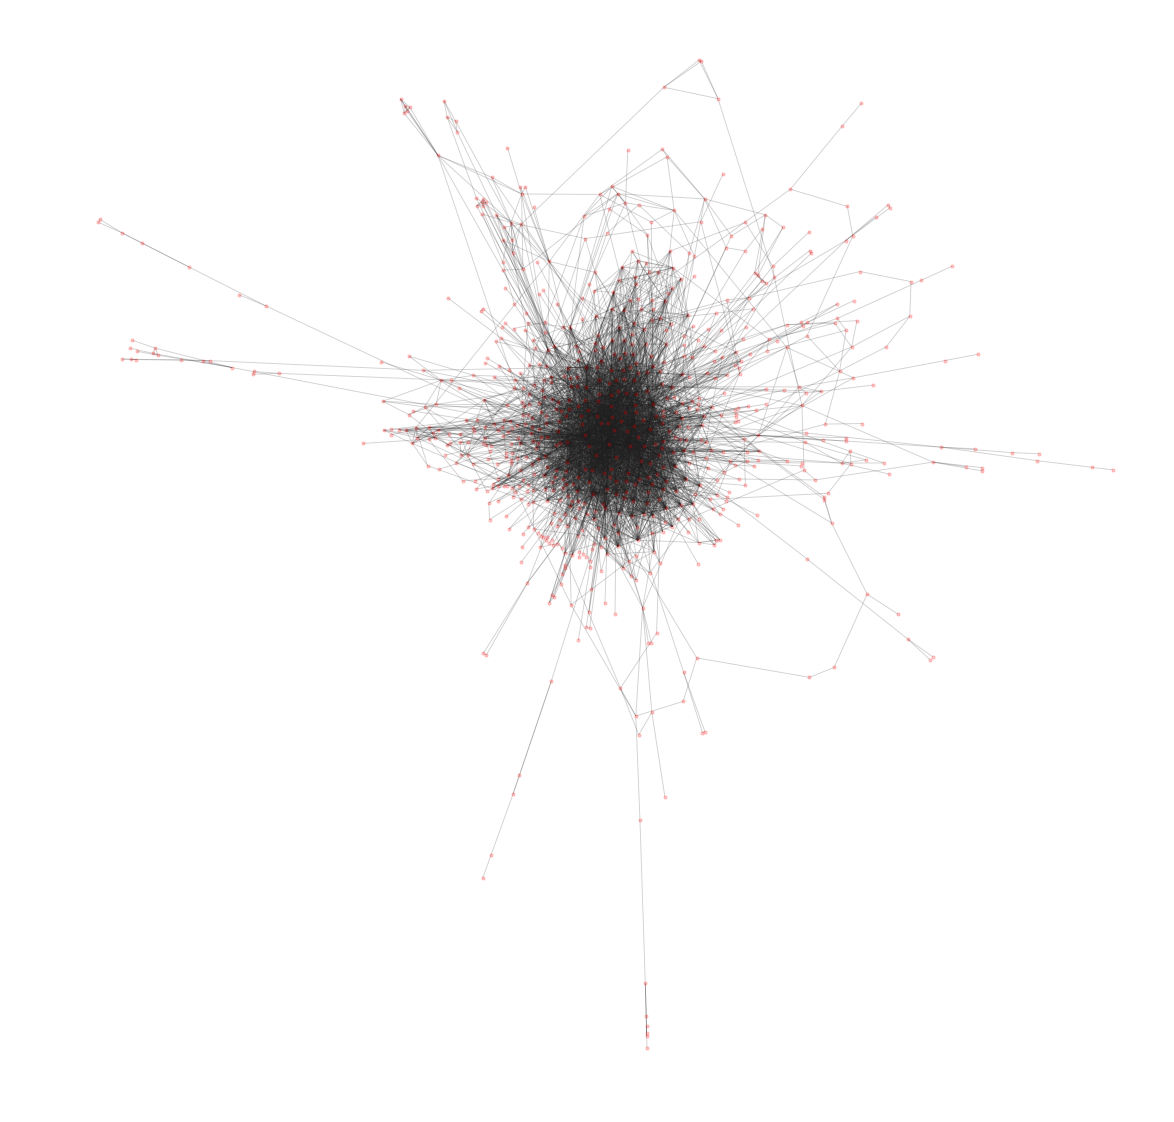

In [23]:
plt.figure(1, figsize=(20, 20))
nx.draw_networkx(relevant_characters,pos=position, node_size=10, edge_color='.1', with_labels=False, width=0.9, font_color ='#ff0000', alpha=0.2)
plt.axis('off')
plt.show()

In [24]:
sorted(relevant_characters.degree(), key=lambda kv: kv[1], reverse=True)

[(u'harry potter', 317),
 (u'tom riddle', 229),
 (u'ronald weasley', 198),
 (u'albus dumbledore', 194),
 (u'hermione granger', 191),
 (u'ginevra weasley', 133),
 (u'severus snape', 123),
 (u'sirius black', 116),
 (u'draco malfoy', 112),
 (u'rubeus hagrid', 110),
 (u'arthur weasley', 105),
 (u'dolores umbridge', 102),
 (u'neville longbottom', 98),
 (u'minerva mcgonagall', 89),
 (u'fred weasley', 82),
 (u'luna lovegood', 81),
 (u'molly weasley', 80),
 (u'george weasley', 79),
 (u'bellatrix lestrange', 77),
 (u'lucius malfoy', 76),
 (u'horace slughorn', 76),
 (u'nymphadora tonks', 72),
 (u'william weasley', 71),
 (u'remus lupin', 68),
 (u'cedric diggory', 66),
 (u'dean thomas', 65),
 (u'percy weasley', 65),
 (u'fleur delacour', 64),
 (u'peter pettigrew', 64),
 (u'rita skeeter', 63),
 (u'albus potter', 63),
 (u'angelina johnson', 58),
 (u'cornelius fudge', 56),
 (u'lee jordan', 55),
 (u'lily j. potter', 55),
 (u'kingsley shacklebolt', 54),
 (u'gilderoy lockhart', 54),
 (u'argus filch', 54)

1198

In [25]:
"Harry James Potter" in characters

False

In [26]:
"lily j. potter" in relevant_characters.nodes

True